In [1]:
import pathlib

import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
device

device(type='cuda')

In [3]:
r = torch.rand((2, 2))*5

v = torch.rand((2, 2))

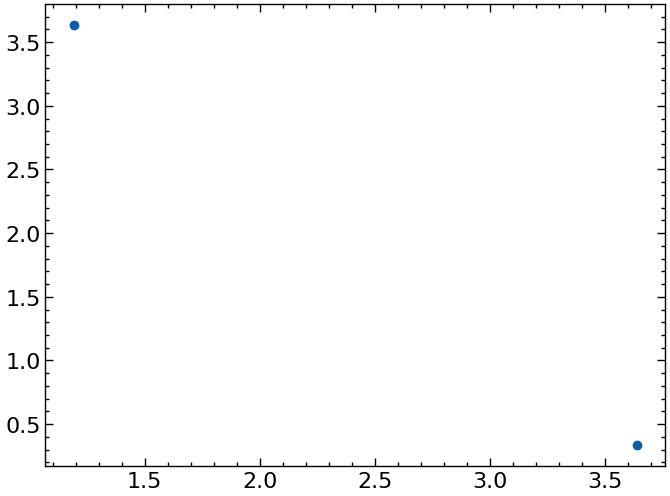

In [4]:
plt.scatter(r[0, :], r[1, :])

In [5]:
def motion(r, v, ts, dt):
    rs = torch.zeros((ts, r.shape[0], r.shape[1])).to(device)
    fs = torch.zeros((ts, r.shape[0])).to(device)
    rs[0] = r
    k = 1
    
    for i in range(1, ts):
        dr = r[:, 0] - r[:, 1]
        f = k * dr / dr.norm()
        v[:, 0] -= f * dt
        v[:, 1] += f * dt
        r += v * dt
        rs[i] = r
        fs[i] = f
    
    return rs, fs

In [6]:
rs, fs = motion(r, v, ts=1000, dt=0.08)

In [7]:
rs

tensor([[[ 3.6411,  1.1908],
         [ 0.3348,  3.6334]],

        [[ 3.7129,  1.2151],
         [ 0.3426,  3.6837]],

        [[ 3.7809,  1.2433],
         [ 0.3555,  3.7290]],

        ...,

        [[50.0064, 50.7087],
         [28.8940, 33.0644]],

        [[50.0646, 50.7466],
         [28.9464, 33.0701]],

        [[50.1239, 50.7834],
         [29.0052, 33.0695]]], device='cuda:0')

In [8]:
fs

tensor([[ 0.0000,  0.0000],
        [ 0.5963, -0.8027],
        [ 0.5988, -0.8009],
        ...,
        [-0.1689, -0.9856],
        [-0.1661, -0.9861],
        [-0.1632, -0.9866]], device='cuda:0')

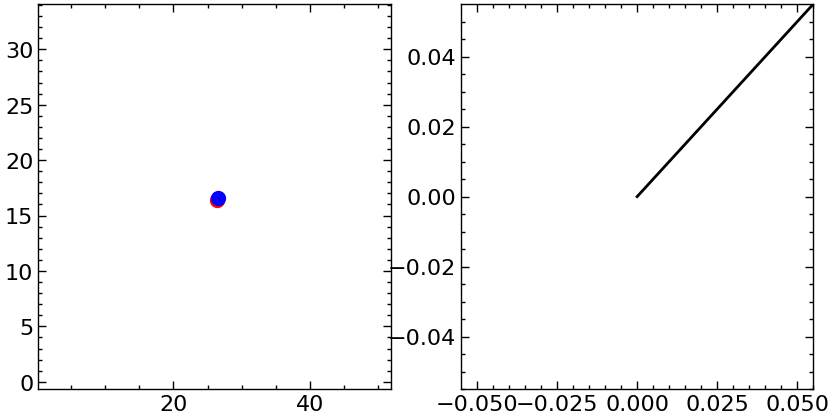

In [30]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].clear()
ax[1].clear()
vmin = 0
vmax = 1
ax[0].set_xlim(torch.min(rs[:, 0, :]).cpu() - 1, torch.max(rs[:, 0, :]).cpu() + 1)
ax[0].set_ylim(torch.min(rs[:, 1, :]).cpu() - 1, torch.max(rs[:, 1, :]).cpu() + 1)
markersize = 10
red, = ax[0].plot([], [], 'o', color='red', markersize=markersize)
blue, = ax[0].plot([], [], 'o', color='blue', markersize=markersize)
force, = ax[1].plot([], [], color='k')

def animate(i):
    # print(f"{i=}")
    xred, yred = rs[i][0][0:1].cpu(), rs[i][1][0:1].cpu()
    xblue, yblue = rs[i][0][1:2].cpu(),rs[i][1][1:2].cpu()
    red.set_data(xred, yred)
    blue.set_data(xblue, yblue)
    # force.set_data(np.arange(i), fs.norm(dim=1).cpu()[0:i])
    return red, blue

writer = animation.FFMpegWriter(fps=30)
ani = animation.FuncAnimation(fig, animate, frames=500, interval=25, blit=True)
path = pathlib.Path('./ani3.gif')
ani.save('./anim.mp4', writer=writer, dpi=100)

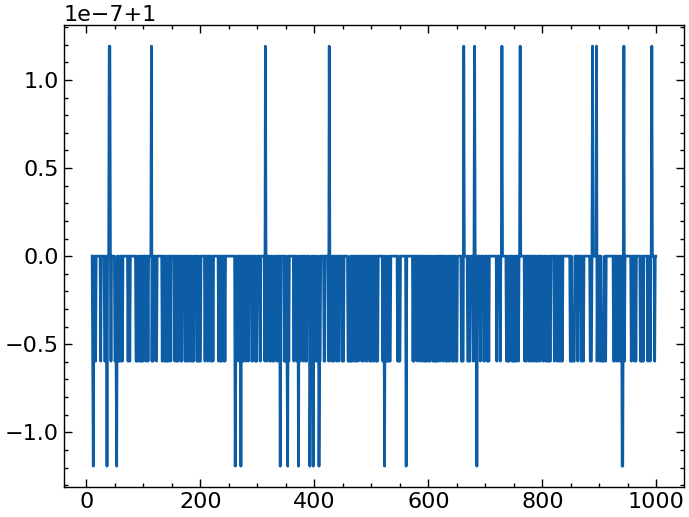

In [29]:
plt.plot(np.arange(1_000)[10:], fs.norm(dim=1).cpu()[10:])

In [24]:
fs.norm(dim=1).shape

torch.Size([1000])

In [31]:
fs.norm(dim=1).cpu()[0:10]

tensor([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])